# Example usage

In [1]:
# all the imports
import lr_cd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Background of the package

### Coordinate Descent Algorithm in Linear Regression

The linear regression model is given by:

\[ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p + \epsilon \]

where \(y\) is the response variable, \(\beta_0\) is the intercept, \(\beta_1, \beta_2, \ldots, \beta_p\) are the coefficients, \(x_1, x_2, \ldots, x_p\) are the predictor variables, and \(\epsilon\) is the error term.

The mean squared error (MSE) for linear regression is given by:

\[ \text{MSE}(\beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip}))^2 \]

The gradient of the MSE with respect to a single coefficient \(\beta_j\) is given by:

\[ \frac{\partial \text{MSE}(\beta)}{\partial \beta_j} = -\frac{2}{n} \sum_{i=1}^{n} x_{ij} (y_i - \hat{y}_i) \]
for \(j=1,\dots,p\),
\[ \frac{\partial \text{MSE}(\beta)}{\partial \beta_j} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \]
for \(j=0\),
where \(\hat{y}_i\) is the predicted value for the \(i\)-th observation.

Therefore, we could update each \(\beta_j\) in the closed-form formula above with the order \(j=0,1,\dots,p\) until convergence. 

**Paragraph describing what packages does**

# Diabetes Dataset Overview:

The diabetes dataset comprises information on 442 patients diagnosed with diabetes. For each individual, ten baseline variables were recorded, including age, sex, body mass index (bmi), average blood pressure (bp), and six measurements related to blood serum. Additionally, the dataset includes a quantitative measure of disease progression one year after the baseline.

Characteristics of the Dataset:

- Number of Instances: 442
- Number of Attributes: The first 10 columns consist of numeric predictive values.
- Target: Column 11 represents the quantitative measure of disease progression one year after the baseline.

Attribute Information:

1. age: Age in years
2. sex
3. bmi: Body mass index
4. bp: Average blood pressure
5. s1 tc: Total serum cholesterol
6. s2 ldl: Low-density lipoproteins
7. s3 hdl: High-density lipoproteins
8. s4 tch: Total cholesterol / HDL
9. s5 ltg: Possibly the log of serum triglycerides level
10. s6 glu: Blood sugar level

Note: Each of the ten feature variables has been mean-centered and scaled by the standard deviation multiplied by the square root of the number of samples (i.e., the sum of squares of each column totals 1).

For additional details, refer to the source URL: [Diabetes Dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

For further insights, see the work of Bradley Efron, Trevor Hastie, Iain Johnstone, and Robert Tibshirani in their 2004 paper "Least Angle Regression" published in the Annals of Statistics, available at [Least Angle Regression](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf).

# Data Generation Function

The `generate_data_lr` function offers a convenient method for generating random data points. Initially, an array of random numbers is generated from a half-open interval [0.0, 1.0) to serve as the x-coordinates of the data points. Subsequently, the y-coordinates are computed using the true coefficients specified by the user. A random `noise` factor is generated from a normal distribution with a mean of 0 and a variance specified by the user, which is then added to the y-coordinates.

Users have control over the number of data points, the number of features (regressors), and the true coefficients by providing values for `n`, `n_features`, and `theta` in the function. An array with at least 2 elements is expected for `theta`, with the first element always being the true intercept.

Optional inputs include `noise` and `random_seed`. Specifying a value larger than the default `0.2` increases the variation and dispersion of the data away from the true regression line. It is recommended for users to include a `random_seed` for reproducibility.


In [2]:
from lr_cd.lr_data_generation import generate_data_lr
import numpy as np

# example 1
theta = np.array([4, 3])
X, y = generate_data_lr(n=10, n_features=1, theta=theta)

## Results of `sklearn`

# algorithm function

**describe what this function does**
The `coordinate_descent` function, imported from the `lr_cd` module, implements the coordinate descent algorithm for linear regression. In the provided example, the function is applied to a feature matrix `X` and a response vector `y`. The output consists of the optimized intercept and coefficient weights, represented by the variables `intercept` and `coef`, respectively. The underscore (`_`) is a conventional placeholder for optional outputs not explicitly used in this case. The returned `intercept` and `coef` values represent the optimized parameters obtained through the coordinate descent algorithm, providing a fitted linear regression model for the given input data.

In [3]:
from lr_cd.lr_cd import coordinate_descent

# example 1 use the data generation function output 1
intercept_1, coef_1, _ = coordinate_descent(X, y)
intercept_1, coef_1

(4.0240072117306145, array([[3.10261496]]))

In [4]:
# example 2: from real-word dataset

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [5]:
# lr_cd
intercept_2, coef_2, _ = coordinate_descent(diabetes_X_train, diabetes_y_train)
intercept_2, coef_2

(152.9188618261616, array([[938.23786125]]))

**comparing our result with sklearn package, briefly explain the goal here (same result as sklearn)**
Comparing the results of the coordinate descent algorithm of `lr_cd` with `sklearn` serves to validate the correctness and accuracy of the implementation. This comparison ensures that both implementations produce the same or highly similar outcomes for linear regression problems. 

It is a standard practice to benchmark against sklearn to confirm adherence to expected behavior, gain confidence in correctness, and identify and address any potential issues or bugs in the custom algorithm.


In [6]:
# compare sklearn result for example 1
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# results
intercept_s_1, coef_s_1= lin_reg.intercept_, lin_reg.coef_
intercept_s_1, coef_s_1

(array([4.02400155]), array([[3.10262393]]))

In [7]:
# compare sklearn result for example 2
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# results
intercept_s_2, coef_s_2= regr.intercept_, regr.coef_
intercept_s_2, coef_s_2

(152.91886182616113, array([938.23786125]))

**explain the result, and compare it to the result generated from lr_cd**
Upon visual inspection, the results obtained from both approaches appear highly similar, reinforcing the accuracy of coordinate descent algorithm in `lr_cd`. This visual confirmation provides strong support for the consistency and reliability of the implementation of `lr_cd`, as the outcomes closely align with those generated by the `sklearn`.

# visualization funtion

**describe what this function does**

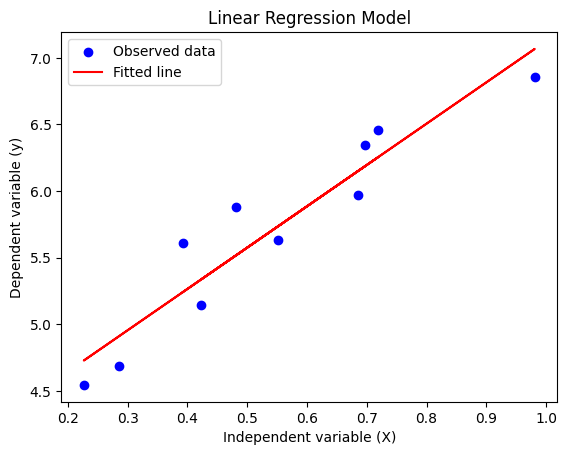

In [8]:
# example 1
from lr_cd.lr_plotting import plot_lr
plot_1 = plot_lr(X, y, intercept_1, coef_1)

In [11]:
# example 1 of sklearn
...


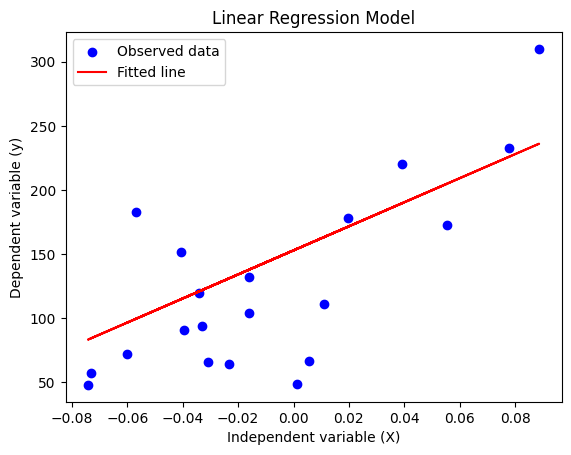

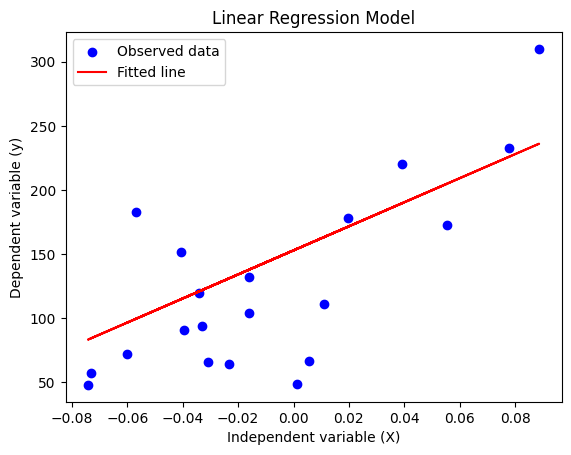

In [9]:
# example 2:

# plot outputs from our package
plot_lr(diabetes_X_test, diabetes_y_test, intercept_s_2, coef_s_2)


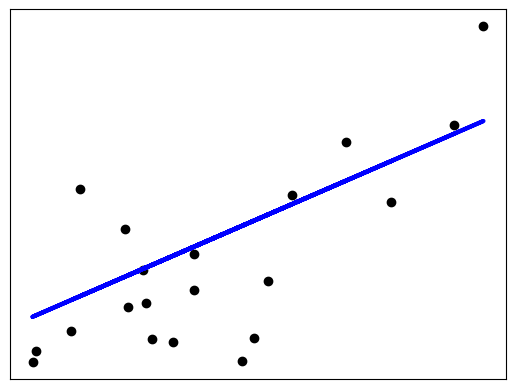

In [10]:
# Plot outputs from sklearn
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()